In [15]:
import numpy as np

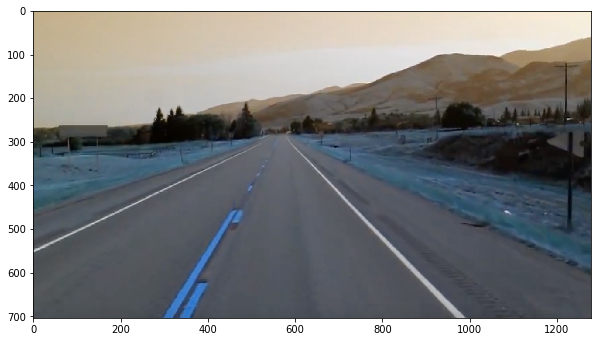

In [16]:
import cv2
image=cv2.imread("road.jpg")

#cv2.imshow("result",image)
#cv2.waitKey(0)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.imshow(image)
plt.show()

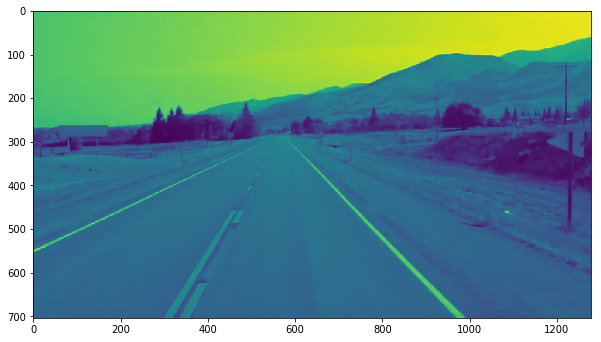

In [17]:
gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
#cv2.imshow("result",gray)

#cv2.waitKey(0)
plt.figure(figsize=(10,10))
plt.imshow(gray)
plt.show()

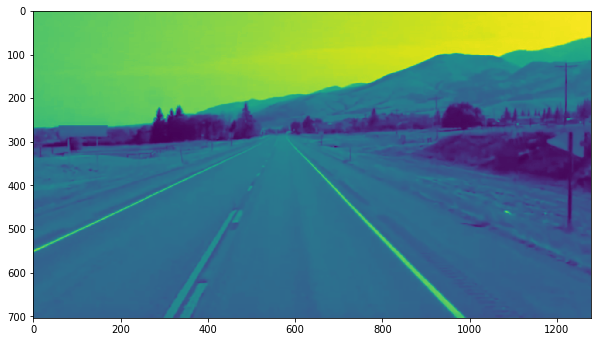

In [18]:
#reduciing the noise
blur=cv2.GaussianBlur(gray,(5,5),0)
plt.figure(figsize=(10,10))
plt.imshow(blur)
plt.show()

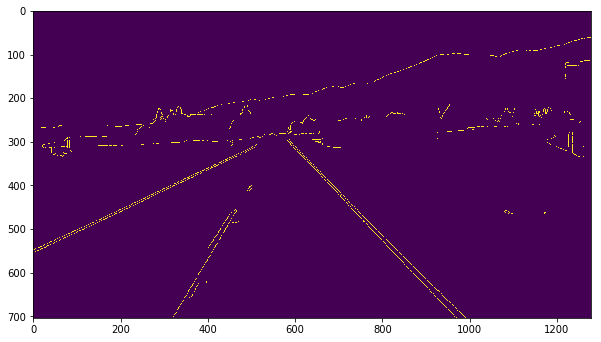

In [29]:
canny=cv2.Canny(blur,50,150)
plt.figure(figsize = (10,10))
plt.imshow(canny)
plt.show()

def canny(image):
    gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    blur=cv2.GaussianBlur(gray,(5,5),0)
    canny_image=cv2.Canny(blur,50,150)
    return canny_image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


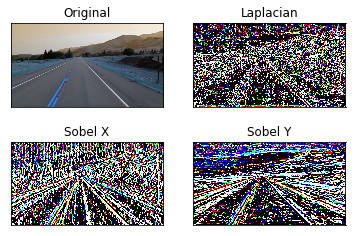

In [30]:
img=np.copy(image)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def canny(image):
	gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
	blur=cv2.GaussianBlur(gray,(5,5),0) #reduce noise
	canny = cv2.Canny(blur,50,150)
	return canny



def region_of_intrest(image):
    height=image.shape[0]
    poly=np.array([
        [(200,height),(1100,height),(550,250)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, poly,255)
    #cv2.polylines(image, np.int32([poly]), 1, (255,255,255))
    return mask

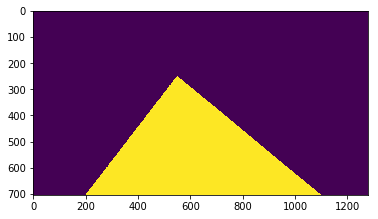

<Figure size 720x720 with 0 Axes>

In [32]:
lane_image=np.copy(image)
canny=canny(lane_image)
plt.imshow(region_of_intrest(canny))
plt.figure(figsize = (10,10))
plt.show()


In [33]:
def region_of_intrest_masked(image):
    height=image.shape[0]
    poly=np.array([
        [(200,height),(1100,height),(550,250)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, poly,255)
    masked_image=cv2.bitwise_and(image,mask)
    #cv2.polylines(image, np.int32([poly]), 1, (255,255,255))
    return masked_image

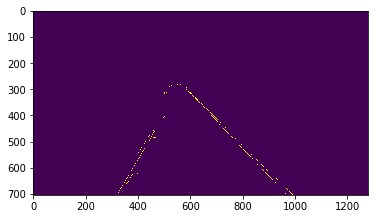

<Figure size 720x216 with 0 Axes>

In [34]:
cropped_image=region_of_intrest_masked(canny)
plt.imshow(cropped_image)
plt.figure(figsize = (10,3))
plt.show()

#comuted the lanes

hey in displya lines (704, 1279, 3)
[[ 672  385 1005  718]]
[[354 692 400 607]]
[[594 309 666 377]]
[[635 342 818 519]]
[[402 604 501 416]]
[[911 606 979 670]]
[[897 609 939 651]]
[[814 514 917 611]]
[[589 299 641 349]]
[[671 383 755 467]]
hey in  display lines (704, 1279, 3)


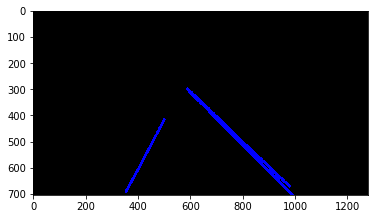

<Figure size 720x216 with 0 Axes>

In [52]:
def display_lines(image,lines):
    print("hey in displya lines",image.shape)
    line_image=np.zeros_like(image)
    if lines is not None:
        for line in lines:
            print(line)
            x1,y1,x2,y2=line.reshape(4)
            cv2.line(line_image,(x1,y1),(x2,y2),(0,0,255),10)#(R,G,B) we are giving blue=255,10 is thickness
    print("hey in  display lines",line_image.shape)       
    return line_image       
             
                

lines=cv2.HoughLinesP(cropped_image,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)
line_image=display_lines(lane_image,lines)
plt.imshow(line_image)
plt.figure(figsize = (10,3))
plt.show()


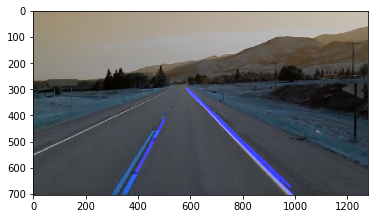

In [53]:
#adding blue lines to original
combo_image=cv2.addWeighted(lane_image,0.8,line_image,1,1)
plt.imshow(combo_image)
#plt.figure(figsize = (10,7))
plt.show()

lines are not single making them single

[   1. -287.] 

[  -1.84782609 1346.13043478] 

[   0.94444444 -252.        ] 

[   0.96721311 -272.18032787] 

[  -1.8989899  1367.39393939] 

[   0.94117647 -251.41176471] 

[   1. -288.] 

[   0.94174757 -252.58252427] 

[   0.96153846 -267.34615385] 

[   1. -288.] 

[(-1.8478260869565206, 1346.130434782608), (-1.898989898989897, 1367.3939393939384)]
[(1.0000000000000007, -287.00000000000085), (0.9444444444444452, -252.00000000000026), (0.9672131147540983, -272.1803278688529), (0.9411764705882346, -251.41176470588167), (0.9999999999999984, -287.99999999999875), (0.941747572815531, -252.58252427184215), (0.9615384615384596, -267.3461538461526), (0.9999999999999996, -287.9999999999993)]
left averge [  -1.87340799 1356.76218709]
right average [   0.96951501 -269.81509634]
hey in displya lines (704, 1279, 3)
[348 704 498 422]
[1004  704  713  422]
hey in  display lines (704, 1279, 3)


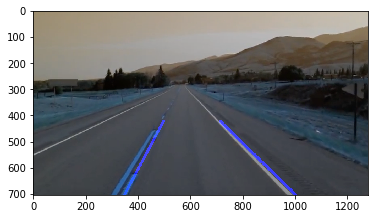

In [54]:
def make_cordinates(image,line_parameters):
    slope,intercept=line_parameters
    y1=image.shape[0]
    y2=int(y1*3/5)
    x1=int((y1-intercept)/(slope)) #y=mx+c  x=y-c/m
    x2=int((y2-intercept)/(slope))
    return np.array([x1,y1,x2,y2])

    
    



def average_slope_intercept(image,lines):
    left_fit=[]
    right_fit=[]
    for line in lines:
        x1,y1,x2,y2=line.reshape(4)
        parameters=np.polyfit((x1,x2),(y1,y2),1) #see x-cordinate and then y-cordinates not x1,y1
        print(parameters, "\n")
        slope,intercept=parameters[0],parameters[1]
        if slope<0: #from above diagram slope negative for left line
            left_fit.append((slope,intercept))
        else:
            right_fit.append((slope,intercept))
            
    print(left_fit)
    print(right_fit)
    left_fit_average=np.average(left_fit,axis=0)
    right_fit_average=np.average(right_fit,axis=0)
    print("left averge",left_fit_average)
    print("right average",right_fit_average)
    left_line=make_cordinates(image,left_fit_average)
    
    right_line=make_cordinates(image,right_fit_average)
    return np.array([left_line,right_line])
    
    
    


averaged_lines=average_slope_intercept(lane_image,lines)
line_image=display_lines(lane_image,averaged_lines)

combo_image=cv2.addWeighted(lane_image,0.8,line_image,1,1)
plt.imshow(line_image)
plt.imshow(combo_image)
plt.show()

#cv2.imshow("result",combo_image)
#cv2.waitKey(0)

In [56]:
cap=cv2.VideoCapture("test2.mp4")
def canny(image):
	gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
	blur=cv2.GaussianBlur(gray,(5,5),0)
	canny_image=cv2.Canny(blur,50,150)
	return canny_image
while(cap.isOpened()):
    _,frame=cap.read()
    canny_image=canny(frame)
    cropped_image=region_of_intrest_masked(canny_image)
    lines=cv2.HoughLinesP(cropped_image,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)
    averaged_lines=average_slope_intercept(frame,lines)
    
    line_image=display_lines(frame,averaged_lines)
    print(frame.shape,line_image.shape,cropped_image.shape)
    combo_image=cv2.addWeighted(frame,0.8,line_image,1,1)
    cv2.imshow("result",combo_image)
    if cv2.waitKey(1)==ord('q'):
        break

        
cap.release()
cv2.destroyAllWindows()
    
    
    
    

[   1. -287.] 

[  -1.84782609 1346.13043478] 

[   0.94444444 -252.        ] 

[   0.96721311 -272.18032787] 

[  -1.8989899  1367.39393939] 

[   0.94117647 -251.41176471] 

[   1. -288.] 

[   0.94174757 -252.58252427] 

[   0.96153846 -267.34615385] 

[   1. -288.] 

[(-1.8478260869565206, 1346.130434782608), (-1.898989898989897, 1367.3939393939384)]
[(1.0000000000000007, -287.00000000000085), (0.9444444444444452, -252.00000000000026), (0.9672131147540983, -272.1803278688529), (0.9411764705882346, -251.41176470588167), (0.9999999999999984, -287.99999999999875), (0.941747572815531, -252.58252427184215), (0.9615384615384596, -267.3461538461526), (0.9999999999999996, -287.9999999999993)]
left averge [  -1.87340799 1356.76218709]
right average [   0.96951501 -269.81509634]
hey in displya lines (720, 1280, 3)
[339 720 493 432]
[1020  720  723  432]
hey in  display lines (720, 1280, 3)
(720, 1280, 3) (720, 1280, 3) (720, 1280)
[   1. -287.] 

[   0.94202899 -250.56521739] 

[  -1.8843537

[  -1.8757764 1351.0310559] 

[   0.9245283  -232.52830189] 

[   0.97183099 -273.07042254] 

[   1. -283.] 

[(-1.8805970149253715, 1353.8059701492527), (-1.8749999999999944, 1349.8749999999975), (-1.8757763975155288, 1351.0310559006214)]
[(0.9690721649484535, -271.71134020618547), (1.0000000000000013, -284.0000000000013), (0.9999999999999972, -285.99999999999767), (1.0337078651685387, -312.05617977528016), (0.9347826086956509, -243.04347826086783), (1.0000000000000007, -284.00000000000045), (0.9245283018867931, -232.52830188679332), (0.9718309859154908, -273.0704225352094), (1.0000000000000004, -282.99999999999983)]
left averge [  -1.87712447 1351.57067535]
right average [   0.98154688 -274.37885807]
hey in displya lines (720, 1280, 3)
[336 720 489 432]
[1013  720  719  432]
hey in  display lines (720, 1280, 3)
(720, 1280, 3) (720, 1280, 3) (720, 1280)
[   0.97260274 -273.87671233] 

[   0.93495935 -242.20325203] 

[   1. -284.] 

[   1. -285.] 

[  -1.87826087 1352.68695652] 

[   0

[   0.98 -276.3 ] 

[   1. -279.] 

[   0.97183099 -270.63380282] 

[   1. -281.] 

[   0.96923077 -267.27692308] 

[  -1.875 1346.75 ] 

[   1.03508772 -311.07017544] 

[   1.02380952 -298.52380952] 

[   0.95890411 -259.        ] 

[  -1.88732394 1350.25352113] 

[   1.03278689 -307.57377049] 

[   0.96774194 -269.12903226] 

[   0.96815287 -265.56687898] 

[(-1.875000000000002, 1346.7500000000011), (-1.8873239436619746, 1350.2535211267616)]
[(0.9799999999999944, -276.29999999999524), (0.9999999999999987, -278.99999999999875), (0.9718309859154918, -270.6338028169004), (1.0000000000000009, -281.00000000000045), (0.9692307692307686, -267.27692307692274), (1.0350877192982453, -311.0701754385962), (1.0238095238095228, -298.5238095238089), (0.9589041095890396, -258.99999999999915), (1.0327868852459003, -307.57377049180246), (0.9677419354838693, -269.1290322580626), (0.968152866242038, -265.5668789808913)]
left averge [  -1.88116197 1348.50176056]
right average [   0.99159498 -280.46130842

[   1.02380952 -294.57142857] 

[   1. -285.] 

[  -1.66666667 1232.        ] 

[   0.97402597 -260.57142857] 

[   0.98245614 -273.59649123] 

[(-1.883040935672511, 1349.8187134502905), (-1.671755725190843, 1237.244274809162), (-1.6666666666666736, 1231.333333333337), (-1.6666666666666672, 1232.0)]
[(0.9657794676806085, -262.23193916349845), (0.999999999999999, -276.99999999999886), (1.0000000000000044, -275.00000000000466), (1.0000000000000013, -276.0000000000012), (1.0238095238095197, -294.57142857142543), (1.0000000000000022, -285.00000000000153), (0.9740259740259724, -260.57142857142713), (0.9824561403508741, -273.5964912280677)]
left averge [  -1.7220325 1262.5990804]
right average [   0.99325889 -275.49641094]
hey in displya lines (720, 1280, 3)
[315 720 482 432]
[1002  720  712  432]
hey in  display lines (720, 1280, 3)
(720, 1280, 3) (720, 1280, 3) (720, 1280)
[   0.96527778 -261.72222222] 

[   1. -278.] 

[   1.05 -322.45] 

[  -1.67391304 1237.32608696] 

[  -1.87586207 134

[   1. -275.] 

[  -1.61728395 1202.69135802] 

[  -1.6741573  1232.96629213] 

[(-1.6792452830188658, 1232.584905660376), (-1.8688524590163915, 1338.032786885245), (-1.6785714285714308, 1232.8214285714291), (-1.8750000000000029, 1339.5000000000014), (-1.9347826086956497, 1360.4999999999989), (-1.6172839506172831, 1202.6913580246908), (-1.6741573033707835, 1232.96629213483)]
[(0.9583333333333285, -256.1666666666636), (1.0000000000000016, -276.0000000000014), (0.9648093841642231, -261.0205278592376), (0.9999999999999988, -276.99999999999875), (0.9999999999999987, -273.9999999999985), (0.9803921568627453, -264.3725490196077), (0.9761904761904717, -273.80952380951976), (1.0000000000000027, -275.00000000000296)]
left averge [  -1.76112758 1277.01382447]
right average [   0.98496567 -269.67115842]
hey in displya lines (720, 1280, 3)
[316 720 479 432]
[1004  720  712  432]
hey in  display lines (720, 1280, 3)
(720, 1280, 3) (720, 1280, 3) (720, 1280)
[   0.95833333 -256.16666667] 

[   1. -2

[   0.96694215 -262.14876033] 

[   1. -276.] 

[  -1.7804878  1292.31707317] 

[   0.94520548 -244.05479452] 

[   1. -275.] 

[  -1.8 1301.2] 

[   0.94318182 -240.40909091] 

[  -1.91489362 1345.17021277] 

[  -1.86567164 1330.25373134] 

[   1. -275.] 

[   0.94736842 -245.47368421] 

[   1. -279.] 

[   1. -278.] 

[   0.96226415 -257.86792453] 

[   1. -274.] 

[(-1.7804878048780504, 1292.3170731707328), (-1.7999999999999963, 1301.1999999999987), (-1.9148936170212736, 1345.1702127659566), (-1.8656716417910455, 1330.2537313432838)]
[(0.966942148760329, -262.1487603305776), (0.9999999999999997, -276.0), (0.9452054794520558, -244.05479452054928), (1.0000000000000024, -275.00000000000153), (0.9431818181818142, -240.4090909090871), (0.9999999999999958, -274.9999999999959), (0.9473684210526269, -245.47368421052218), (1.000000000000008, -279.0000000000056), (0.9999999999999998, -277.9999999999997), (0.9622641509433946, -257.86792452830076), (0.9999999999999998, -273.9999999999999)]
left

[   0.96707819 -257.81481481] 

[  -1.80808081 1305.        ] 

[   1.03787879 -304.34848485] 

[   1.03731343 -299.92537313] 

[   0.95454545 -249.59090909] 

[   0.97122302 -254.3381295 ] 

[   0.94339623 -241.94339623] 

[  -1.88372093 1333.04651163] 

[   0.97674419 -265.23255814] 

[   0.93939394 -239.96969697] 

[   1. -272.] 

[  -1.8 1302. ] 

[(-1.8080808080808135, 1305.0000000000032), (-1.88372093023256, 1333.0465116279076), (-1.7999999999999936, 1301.9999999999966)]
[(0.9670781893004115, -257.8148148148147), (1.0378787878787854, -304.34848484848254), (1.0373134328358213, -299.9253731343289), (0.9545454545454543, -249.5909090909088), (0.9712230215827342, -254.3381294964033), (0.9433962264150935, -241.9433962264146), (0.9767441860465113, -265.2325581395343), (0.9393939393939389, -239.96969696969654), (0.9999999999999984, -271.9999999999987)]
left averge [  -1.83060058 1313.34883721]
right average [   0.98084147 -265.01815141]
hey in displya lines (720, 1280, 3)
[324 720 481 43

[   0.97727273 -265.81818182] 

[   0.90196078 -213.66666667] 

[   0.96428571 -255.42857143] 

[(-1.7799999999999971, 1289.4799999999987), (-1.7462686567164145, 1272.4776119402968), (-1.8571428571428539, 1317.5714285714275)]
[(1.0352941176470583, -299.5058823529401), (0.9661016949152551, -255.08474576271283), (1.0328947368421055, -297.0921052631584), (0.9545454545454517, -248.681818181816), (0.964705882352941, -250.28235294117633), (0.9803921568627474, -264.68627450980534), (1.0491803278688527, -314.4426229508202), (0.9772727272727221, -265.8181818181774), (0.9019607843137254, -213.66666666666669), (0.9642857142857153, -255.42857142857233)]
left averge [  -1.7944705  1293.17634684]
right average [   0.98266336 -266.46892219]
hey in displya lines (720, 1280, 3)
[319 720 479 432]
[1003  720  710  432]
hey in  display lines (720, 1280, 3)
(720, 1280, 3) (720, 1280, 3) (720, 1280)
[   1.03529412 -299.50588235] 

[   0.96610169 -255.08474576] 

[  -1.78 1289.48] 

[   1.03289474 -297.09210

[304 720 475 432]
[1001  720  710  432]
hey in  display lines (720, 1280, 3)
(720, 1280, 3) (720, 1280, 3) (720, 1280)
[   1.03636364 -299.83636364] 

[   0.98039216 -268.74509804] 

[   0.95876289 -250.49484536] 

[  -1.72727273 1260.81818182] 

[  -1.78723404 1284.14893617] 

[   0.93548387 -235.        ] 

[  -1.68965517 1240.75862069] 

[   0.97674419 -263.90697674] 

[   0.94117647 -240.70588235] 

[   0.96 -246.52] 

[  -1.76 1272.64] 

[   0.97297297 -261.59459459] 

[  -1.74725275 1268.6043956 ] 

[(-1.727272727272718, 1260.818181818177), (-1.7872340425531936, 1284.1489361702136), (-1.6896551724137898, 1240.7586206896538), (-1.7599999999999967, 1272.6399999999987), (-1.7472527472527475, 1268.6043956043954)]
[(1.0363636363636375, -299.8363636363642), (0.9803921568627425, -268.7450980392134), (0.9587628865979387, -250.49484536082562), (0.935483870967741, -234.99999999999955), (0.9767441860465126, -263.90697674418726), (0.9411764705882361, -240.70588235294164), (0.9600000000000014

[   1.03225806 -294.32258065] 

[   0.97368421 -260.42105263] 

[  -1.73684211 1262.        ] 

[   0.93457944 -232.54205607] 

[  -1.71698113 1252.52830189] 

[   0.9673913  -253.26086957] 

[   0.9787234  -256.87234043] 

[   0.97674419 -262.8372093 ] 

[   0.95454545 -246.54545455] 

[  -1.74358974 1263.43589744] 

[  -1.68085106 1239.53191489] 

[   1.04761905 -307.33333333] 

[   1. -283.] 

[  -1.73529412 1260.67647059] 

[  -1.70588235 1249.76470588] 

[(-1.7368421052631577, 1261.9999999999998), (-1.7169811320754673, 1252.5283018867904), (-1.743589743589742, 1263.4358974358965), (-1.6808510638297873, 1239.5319148936167), (-1.735294117647062, 1260.676470588237), (-1.705882352941181, 1249.7647058823547)]
[(1.0322580645161283, -294.3225806451607), (0.9736842105263158, -260.421052631579), (0.9345794392523353, -232.54205607476558), (0.9673913043478246, -253.26086956521613), (0.9787234042553171, -256.8723404255305), (0.9767441860465075, -262.8372093023222), (0.954545454545452, -246.54

[   0.96923077 -257.09230769] 

[  -1.73809524 1252.23809524] 

[   1.02702703 -292.48648649] 

[   1. -271.] 

[   0.96808511 -258.21276596] 

[  -1.71428571 1244.28571429] 

[   1.03472222 -298.34722222] 

[   1. -287.] 

[  -1.75 1261.75] 

[  -1.9 1332.8] 

[   0.97674419 -264.79069767] 

[  -1.74509804 1258.21568627] 

[   0.97777778 -265.66666667] 

[   0.97333333 -262.97333333] 

[   1. -288.] 

[(-1.7380952380952361, 1252.2380952380947), (-1.714285714285716, 1244.2857142857151), (-1.7499999999999962, 1261.7499999999982), (-1.9000000000000026, 1332.8000000000009), (-1.7450980392156923, 1258.2156862745128)]
[(0.9692307692307713, -257.09230769230936), (1.027027027027028, -292.4864864864875), (0.9999999999999991, -270.99999999999943), (0.9680851063829796, -258.2127659574476), (1.034722222222223, -298.34722222222285), (0.9999999999999964, -286.999999999996), (0.9767441860465143, -264.79069767442115), (0.9777777777777723, -265.66666666666254), (0.9733333333333358, -262.9733333333357)

[   1. -270.] 

[  -1.67924528 1234.52830189] 

[(-1.7411764705882307, 1259.8941176470562), (-1.677419354838709, 1232.8064516129027), (-1.6792452830188704, 1234.5283018867933)]
[(0.9672131147540974, -255.01639344262196), (0.9999999999999987, -268.9999999999993), (1.0283687943262434, -292.32624113475407), (1.0222222222222195, -287.46666666666414), (0.9417475728155325, -236.04854368931893), (0.9374999999999979, -230.12499999999832), (1.0181818181818174, -283.9636363636358), (0.9675675675675673, -256.3405405405404), (0.9999999999999999, -274.0), (0.9523809523809579, -243.85714285714673), (1.0476190476190481, -311.00000000000074), (1.0000000000000004, -270.00000000000034)]
left averge [  -1.69928037 1242.40962372]
right average [   0.99023342 -267.42868039]
hey in displya lines (720, 1280, 3)
[307 720 476 432]
[997 720 706 432]
hey in  display lines (720, 1280, 3)
(720, 1280, 3) (720, 1280, 3) (720, 1280)
[   0.96721311 -255.01639344] 

[   1. -269.] 

[   1.02836879 -292.32624113] 

[  -1

[   0.97391304 -256.92173913] 

[   1. -265.] 

[   0.93693694 -230.34234234] 

[  -1.56410256 1163.76923077] 

[  -1.73043478 1255.9826087 ] 

[   1. -268.] 

[   1. -266.] 

[  -1.52631579 1150.        ] 

[   0.96039604 -247.1980198 ] 

[  -1.55319149 1160.40425532] 

[   0.92993631 -224.30573248] 

[   1. -267.] 

[  -1.72727273 1250.45454545] 

[   0.95121951 -241.41463415] 

[   0.94545455 -235.96363636] 

[  -1.53125 1150.8125 ] 

[   0.97826087 -254.56521739] 

[  -1.54117647 1156.16470588] 

[  -1.65517241 1227.4137931 ] 

[(-1.5641025641025514, 1163.769230769224), (-1.7304347826086963, 1255.9826086956523), (-1.526315789473682, 1149.9999999999993), (-1.553191489361702, 1160.404255319149), (-1.7272727272727229, 1250.4545454545437), (-1.5312499999999973, 1150.812499999999), (-1.541176470588236, 1156.1647058823528), (-1.6551724137930923, 1227.413793103444)]
[(0.9739130434782598, -256.921739130434), (0.9999999999999944, -264.9999999999951), (0.9369369369369376, -230.3423423423427)

[   1.03846154 -294.80769231] 

[   1.02631579 -288.28947368] 

[   1. -273.] 

[   0.96666667 -252.36666667] 

[   1.01785714 -279.46428571] 

[   1.02439024 -287.6097561 ] 

[  -1.72307692 1257.        ] 

[   1. -275.] 

[   0.97183099 -257.8028169 ] 

[(-1.725274725274725, 1256.9780219780214), (-1.7230769230769196, 1256.9999999999982)]
[(0.9629629629629625, -250.407407407407), (1.0266666666666648, -288.5599999999983), (0.9690721649484536, -252.81443298969037), (1.0384615384615374, -294.8076923076918), (1.0263157894736816, -288.28947368420813), (1.0000000000000018, -273.00000000000125), (0.9666666666666662, -252.3666666666662), (1.017857142857139, -279.4642857142832), (1.0243902439024404, -287.6097560975624), (0.999999999999998, -274.9999999999984), (0.9718309859154948, -257.8028169014106)]
left averge [  -1.72417582 1256.98901099]
right average [   1.00038401 -272.73841198]
hey in displya lines (720, 1280, 3)
[311 720 478 432]
[992 720 704 432]
hey in  display lines (720, 1280, 3)


[306 720 478 432]
[999 720 708 432]
hey in  display lines (720, 1280, 3)
(720, 1280, 3) (720, 1280, 3) (720, 1280)
[   0.96296296 -254.55555556] 

[   1. -281.] 

[   1. -270.] 

[  -1.67391304 1233.04347826] 

[   0.94174757 -234.9223301 ] 

[   1. -274.] 

[   1. -279.] 

[   0.97142857 -259.        ] 

[   1. -271.] 

[   1.02 -287.72] 

[   1. -273.] 

[  -1.67391304 1235.39130435] 

[   0.97959184 -268.73469388] 

[(-1.673913043478262, 1233.0434782608697), (-1.6739130434782612, 1235.391304347826)]
[(0.9629629629629631, -254.55555555555583), (1.0000000000000016, -281.0000000000013), (1.000000000000001, -270.0000000000007), (0.9417475728155348, -234.92233009708815), (0.9999999999999988, -273.99999999999943), (1.0000000000000002, -279.0), (0.9714285714285729, -259.0000000000012), (0.9999999999999984, -270.9999999999987), (1.0200000000000033, -287.72000000000344), (0.9999999999999999, -272.99999999999994), (0.9795918367346955, -268.7346938775529)]
left averge [  -1.67391304 1234.21739

[   0.96923077 -258.58461538] 

[   1.03278689 -301.01639344] 

[   1.03092784 -296.01030928] 

[  -1.67105263 1232.68421053] 

[  -1.6875 1239.4375] 

[   1.01785714 -286.28571429] 

[   0.97183099 -257.67605634] 

[   0.97727273 -267.11363636] 

[   1.04 -302.44] 

[   0.98 -270.26] 

[   1. -283.] 

[   1. -270.] 

[(-1.6710526315789476, 1232.6842105263163), (-1.6875000000000029, 1239.4375000000016)]
[(0.9692307692307706, -258.58461538461705), (1.0327868852459001, -301.0163934426222), (1.0309278350515472, -296.0103092783515), (1.0178571428571408, -286.28571428571183), (0.9718309859154947, -257.67605633802935), (0.9772727272727254, -267.113636363635), (1.0400000000000014, -302.44000000000096), (0.9799999999999967, -270.25999999999647), (0.9999999999999981, -282.9999999999986), (1.0000000000000018, -270.00000000000176)]
left averge [  -1.67927632 1236.06085526]
right average [   1.00199063 -279.23867251]
hey in displya lines (720, 1280, 3)
[307 720 478 432]
[997 720 709 432]
hey in  d

[  -1.68292683 1237.02439024] 

[   0.97391304 -264.77391304] 

[  -1.66363636 1228.93636364] 

[   0.97560976 -259.87804878] 

[   1.02631579 -294.26315789] 

[   1. -282.] 

[  -1.70588235 1242.41176471] 

[   1. -284.] 

[(-1.6829268292682928, 1237.0243902439022), (-1.6636363636363618, 1228.9363636363626), (-1.7058823529411735, 1242.4117647058813)]
[(0.9668246445497636, -256.55924170616123), (1.031446540880503, -296.7987421383643), (1.039473684210524, -305.105263157893), (0.9739130434782607, -264.7739130434778), (0.9756097560975627, -259.8780487804892), (1.026315789473682, -294.263157894735), (0.9999999999999996, -281.99999999999955), (1.0000000000000007, -284.00000000000034)]
left averge [  -1.68414852 1236.12417286]
right average [   1.00169793 -280.42229584]
hey in displya lines (720, 1280, 3)
[306 720 477 432]
[998 720 711 432]
hey in  display lines (720, 1280, 3)
(720, 1280, 3) (720, 1280, 3) (720, 1280)
[  -1.66906475 1231.56834532] 

[   0.975 -262.575] 

[   1.02739726 -298.

[   1.03571429 -300.89285714] 

[   1. -283.] 

[  -1.66511628 1228.85581395] 

[   1.03267974 -296.4379085 ] 

[  -1.66666667 1230.33333333] 

[   0.98245614 -268.50877193] 

[   1.03030303 -300.03030303] 

[   0.975 -260.9  ] 

[   1. -276.] 

[   1.02272727 -289.18181818] 

[(-1.6651162790697671, 1228.8558139534882), (-1.6666666666666665, 1230.333333333333)]
[(1.0357142857142863, -300.8928571428577), (0.9999999999999986, -282.9999999999991), (1.0326797385620907, -296.43790849673104), (0.9824561403508771, -268.50877192982455), (1.030303030303031, -300.03030303030346), (0.9749999999999993, -260.89999999999924), (0.9999999999999992, -275.99999999999943), (1.0227272727272716, -289.1818181818176)]
left averge [  -1.66589147 1229.59457364]
right average [   1.00986006 -284.36895735]
hey in displya lines (720, 1280, 3)
[305 720 478 432]
[994 720 709 432]
hey in  display lines (720, 1280, 3)
(720, 1280, 3) (720, 1280, 3) (720, 1280)
[   1.03571429 -300.89285714] 

[   1. -283.] 

[  -1.6651

[   1. -285.] 

[   1.03787879 -304.09848485] 

[   1.03759398 -301.9924812 ] 

[  -1.53846154 1152.61538462] 

[  -1.66666667 1225.66666667] 

[   1. -284.] 

[   0.96666667 -254.53333333] 

[   1.03409091 -303.67045455] 

[   1. -276.] 

[  -1.49367089 1136.70886076] 

[   1.03428571 -299.73714286] 

[   0.98076923 -269.44230769] 

[  -1.5106383  1141.63829787] 

[   1. -277.] 

[  -1.66972477 1228.87155963] 

[  -1.51515152 1144.12121212] 

[(-1.5384615384615405, 1152.615384615386), (-1.6666666666666663, 1225.666666666666), (-1.4936708860759484, 1136.7088607594935), (-1.5106382978723458, 1141.6382978723427), (-1.6697247706421996, 1228.8715596330262), (-1.5151515151515091, 1144.1212121212088)]
[(0.9999999999999993, -284.9999999999996), (1.0378787878787876, -304.0984848484847), (1.0375939849624043, -301.99248120300587), (0.9999999999999968, -283.9999999999974), (0.9666666666666657, -254.53333333333273), (1.0340909090909098, -303.6704545454551), (0.9999999999999999, -275.99999999999994

[   1.03496503 -303.47552448] 

[   0.96946565 -263.41984733] 

[  -1.54081633 1149.2755102 ] 

[  -1.51428571 1137.85714286] 

[   0.97727273 -267.15909091] 

[   0.97959184 -266.20408163] 

[  -1.48484848 1127.27272727] 

[   1.06382979 -329.38297872] 

[   0.97674419 -268.09302326] 

[  -1.48453608 1126.73195876] 

[(-1.6666666666666674, 1220.6666666666672), (-1.5408163265306083, 1149.2755102040792), (-1.514285714285711, 1137.8571428571413), (-1.4848484848484829, 1127.2727272727266), (-1.4845360824742264, 1126.7319587628863)]
[(1.0283687943262425, -297.48936170212863), (0.9767441860465125, -268.7674418604657), (1.0349650349650363, -303.4755244755256), (0.9694656488549614, -263.41984732824403), (0.9772727272727303, -267.1590909090939), (0.979591836734695, -266.2040816326538), (1.063829787234043, -329.38297872340445), (0.9767441860465127, -268.09302325581444)]
left averge [  -1.53823065 1152.36080115]
right average [   1.00087278 -282.99891874]
hey in displya lines (720, 1280, 3)
[281